In [2]:
import nltk
from nltk.tokenize import word_tokenize
text = "The quick brown fox jumps over the lazy dog."
# Tokenize the text
tokens = word_tokenize(text)
print(tokens)


['The', 'quick', 'brown', 'fox', 'jumps', 'over', 'the', 'lazy', 'dog', '.']


In [10]:
import nltk
from nltk.tag import pos_tag

# Perform POS tagging
pos_tags = pos_tag(tokens)

print(pos_tags)

[('The', 'DT'), ('quick', 'JJ'), ('brown', 'NN'), ('fox', 'NN'), ('jumps', 'VBZ'), ('over', 'IN'), ('the', 'DT'), ('lazy', 'JJ'), ('dog', 'NN'), ('.', '.')]


In [4]:
import nltk
from nltk.corpus import stopwords

# Get the list of English stop words
stop_words = set(stopwords.words('english'))

# Remove stop words
filtered_tokens = [token for token in tokens if token.lower() not in stop_words]

print(filtered_tokens)

['quick', 'brown', 'fox', 'jumps', 'lazy', 'dog', '.']


In [12]:
import nltk
from nltk.stem import SnowballStemmer
# Initialize the Snowball stemmer with English language
stemmer = SnowballStemmer('english')

# Stem the tokens
stemmed_tokens = [stemmer.stem(token) for token in filtered_tokens]

print(stemmed_tokens)

['quick', 'brown', 'fox', 'jump', 'lazi', 'dog', '.']


In [13]:
import nltk
from nltk.stem import WordNetLemmatizer

# Initialize the WordNet lemmatizer
lemmatizer = WordNetLemmatizer()

# Lemmatize the tokens
lemmatized_tokens = [lemmatizer.lemmatize(token) for token in filtered_tokens]

print(lemmatized_tokens)

['quick', 'brown', 'fox', 'jump', 'lazy', 'dog', '.']


In [14]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Create a list of documents (in this case, we have only one document)
documents = ["The quick brown fox jumped over the lazy dog. The dog slept and the fox ran away into the woods."]

# Initialize the TF-IDF vectorizer with English stop words and unigram (single word) tokens
vectorizer = TfidfVectorizer(stop_words='english', ngram_range=(1,1))

# Fit and transform the documents to TF-IDF matrix
tfidf_matrix = vectorizer.fit_transform(documents)

# Get the feature names (i.e., the unique tokens in the documents)
feature_names = vectorizer.get_feature_names_out()

# Print the TF-IDF matrix as a pandas DataFrame
import pandas as pd
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=feature_names)
print(tfidf_df)

   away  brown  dog  fox  jumped  lazy  quick   ran  slept  woods
0  0.25   0.25  0.5  0.5    0.25  0.25   0.25  0.25   0.25   0.25


In [15]:
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd

# Define some example documents
documents = ["The quick brown fox jumped over the lazy dog.", "The dog slept and the fox ran away into the woods."]

# Initialize the TF-IDF vectorizer with English stop words and unigram (single word) tokens
vectorizer = TfidfVectorizer(stop_words='english', ngram_range=(1,1))

# Fit the vectorizer to the documents and transform them to TF-IDF matrix
tfidf_matrix = vectorizer.fit_transform(documents)

# Get the feature names (i.e., the unique tokens in the vectorizer)
feature_names = vectorizer.get_feature_names_out(documents)

# Print the feature names as a pandas DataFrame
feature_names_df = pd.DataFrame({'feature_name': feature_names})
print(feature_names_df)

  feature_name
0         away
1        brown
2          dog
3          fox
4       jumped
5         lazy
6        quick
7          ran
8        slept
9        woods


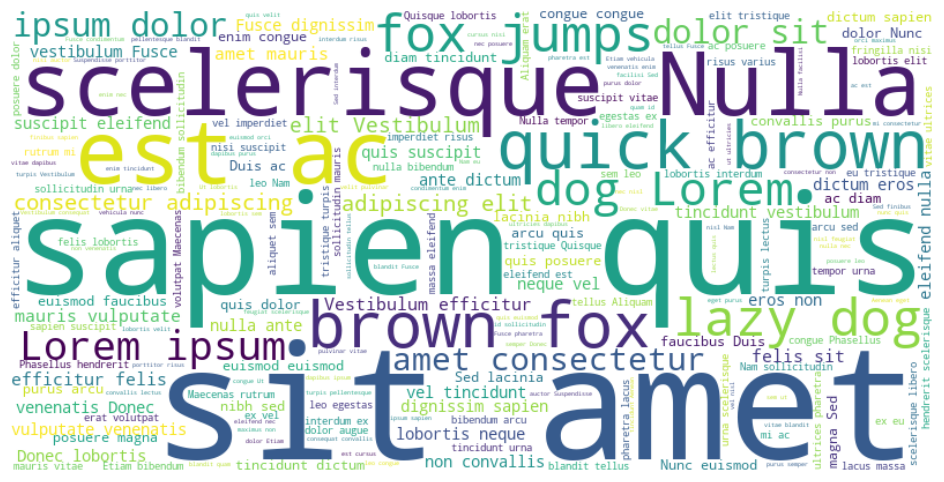

In [6]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Combine the tokens into a single string
text = "The quick brown fox jumps over the lazy dog. Lorem ipsum dolor sit amet, consectetur adipiscing elit. Vestibulum efficitur felis sit amet mauris vulputate venenatis. Donec lobortis neque vel tincidunt vestibulum. Fusce dignissim, sapien quis suscipit eleifend, nulla ante dictum eros, non convallis purus arcu quis dolor. Nunc euismod euismod faucibus. Duis ac diam tincidunt, dictum sapien quis, posuere magna. Sed lacinia nibh sed enim congue congue. Phasellus hendrerit scelerisque libero, in fringilla nisi suscipit vitae.Nulla tempor urna at felis lobortis, non lobortis elit tristique. Quisque lobortis interdum ex, vel imperdiet risus varius at. Etiam bibendum arcu sed sapien suscipit, in tincidunt urna scelerisque. Nulla vel nulla bibendum, sollicitudin urna a, blandit tellus. Aliquam erat volutpat. Maecenas rutrum, mi ac efficitur aliquet, sem leo egestas ex, eu tristique turpis lectus in leo. Nam sollicitudin, mauris vitae ultrices pharetra, lacus massa eleifend est, ac posuere dolor augue in turpis. Vestibulum consequat convallis lectus, quis euismod orci maximus non. Sed finibus sapien vel nisl feugiat scelerisque. Nulla facilisi.Sed interdum risus sed turpis pellentesque blandit. Fusce pharetra est ac est cursus, at cursus nisi auctor. Suspendisse porttitor risus in mi consectetur, non venenatis enim tincidunt. Aenean eget purus dolor. Etiam vehicula nunc quis velit pulvinar, vitae dapibus purus semper. Donec vitae blandit quam, id sollicitudin tellus. Fusce condimentum enim nec libero eleifend, nec posuere leo congue. Ut lobortis, sem ut ultricies dapibus, ipsum sapien lobortis velit, in suscipit nulla nulla nec nisl. Nam eu nisi vel magna auctor lobortis. Vivamus consectetur, turpis in bibendum convallis, ex nibh tempor nulla, sed pretium ex leo vel ipsum. Sed at odio quis purus venenatis rutrum. Sed rhoncus purus non aliquam ullamcorper.".join(tokens)

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white', stopwords=stop_words).generate(text)

# Display the word cloud using matplotlib
plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()